## 1106. Parsing A Boolean Expression

A boolean expression is an expression that evaluates to either true or false. It can be in one of the following shapes:

't' that evaluates to true.
'f' that evaluates to false.
'!(subExpr)' that evaluates to the logical NOT of the inner expression subExpr.
'&(subExpr1, subExpr2, ..., subExprn)' that evaluates to the logical AND of the inner expressions subExpr1, subExpr2, ..., subExprn where n >= 1.
'|(subExpr1, subExpr2, ..., subExprn)' that evaluates to the logical OR of the inner expressions subExpr1, subExpr2, ..., subExprn where n >= 1.
Given a string expression that represents a boolean expression, return the evaluation of that expression.

It is guaranteed that the given expression is valid and follows the given rules.

 

### Example 1:

Input: expression = "&(|(f))"
Output: false
Explanation: 
First, evaluate |(f) --> f. The expression is now "&(f)".
Then, evaluate &(f) --> f. The expression is now "f".
Finally, return false.


### Example 2:

Input: expression = "|(f,f,f,t)"
Output: true
Explanation: The evaluation of (false OR false OR false OR true) is true.

### Example 3:

Input: expression = "!(&(f,t))"
Output: true
Explanation: 
First, evaluate &(f,t) --> (false AND true) --> false --> f. The expression is now "!(f)".
Then, evaluate !(f) --> NOT false --> true. We return true.

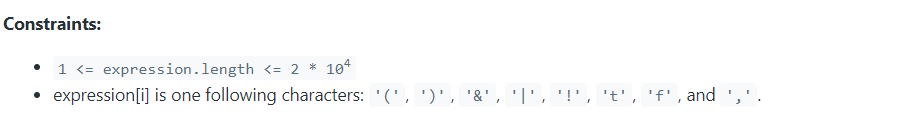

### Solution:

In [1]:
class Solution:
    def parseBoolExpr(self, expression: str) -> bool:
        # Repeatedly simplify the expression by evaluating subexpressions
        while len(expression) > 1:
            start = max(
                expression.rfind("!"),
                expression.rfind("&"),
                expression.rfind("|"),
            )
            end = expression.find(")", start)
            sub_expr = expression[start : end + 1]
            result = self._evaluate_sub_expr(sub_expr)
            expression = expression[:start] + result + expression[end + 1 :]

        return expression == "t"

    def _evaluate_sub_expr(self, sub_expr: str) -> str:
        # Extract the operator and the enclosed values
        op = sub_expr[0]
        values = sub_expr[2:-1]

        # Apply logical operations based on the operator
        if op == "!":
            return "f" if values == "t" else "t"
        if op == "&":
            return "f" if "f" in values else "t"
        if op == "|":
            return "t" if "t" in values else "f"

        return "f"  # This point should never be reached